In [1270]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Study of errors behavior
Starting from a distribution generated from the function of 3 hyperbolic tangents,Study the behavior of the distributions of the Generalization error, Empirical error and the Optimal Model selected in relation to the size of the samples. As approximate functions we will use the set of polynomial functions.

In [1271]:
n_sizes = 10 # how many different sizes of sample we will try
n_samples = 50 # how many different samples we will try with every size
max_polinomial_grade = 10
n = 15 # base size of the sample
mu = 0
xsize = 50
x = xscale * np.random.randn(xsize,1)

(50,)


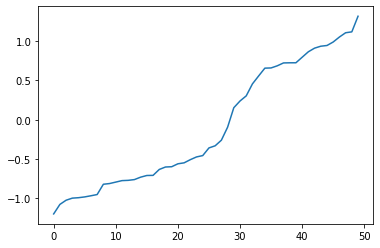

In [1272]:
#y = (1.8 * np.tanh( 3.2 * x + 0.8) - 2.5 * np.tanh( 2.1 * x + 1.2) - 0.2 * np.tanh( 0.1 * x - 0.5)).flatten()
scales = np.array([1.8, -2.5, -0.2])
coefs1 = np.array([3.2, 2.1, 0.1])
coefs2 = np.array([0.8, 1.2, -0.5])
y = (np.sum( scales * ( np.tanh( (x*coefs1) + coefs2) ), axis=1)).flatten()
noise = 0.3 * np.std(y)
y = y + noise * np.random.randn(np.size(y))
plt.plot(np.sort(y));
print(np.shape(y))

In [1232]:
N                    = np.zeros( ( n_sizes, 1 ) )
empirical_error      = np.zeros( ( n_samples, n_sizes ) )
generalization_error = np.zeros( ( n_samples, n_sizes ) )  
best_model           = np.zeros( ( n_samples, n_sizes ) )

In [1212]:
for i in range(n_sizes):
    N[i] = n * (i+1)
    for j in range(0,n_samples):
        xdata = np.sort( xscale * np.random.randn( int(N[i]), 1 ) )        
        ydata = np.sum( scales * ( np.tanh( (xdata*coefs1) + coefs2) ), axis=1)
        ydata = ydata + noise * np.random.normal( mu, sigma, np.size(ydata) )
        grade_empirical_errors = np.zeros( (max_polinomial_grade, 1) )
        grade_generalization_errors = np.zeros( (max_polinomial_grade, 1) )
        for k in range(0,max_polinomial_grade):
            coefs = np.polyfit( xdata[:,0], ydata, k+1 )
            fit_ydata = np.polyval(coefs, xdata).flatten()
            grade_empirical_errors[k] = np.sum(np.square(ydata-fit_ydata))
            fit_y = np.polyval(coefs, x).flatten()            
            grade_generalization_errors[k] = np.sum(np.square(y-fit_y))            
        empirical_error[j, i]      = np.amin(grade_empirical_errors, axis = 0);
        best_model[j, i]           = np.argmin(grade_generalization_errors, axis = 0);
        generalization_error[j, i] = grade_generalization_errors[int(best_model[j, i])] 

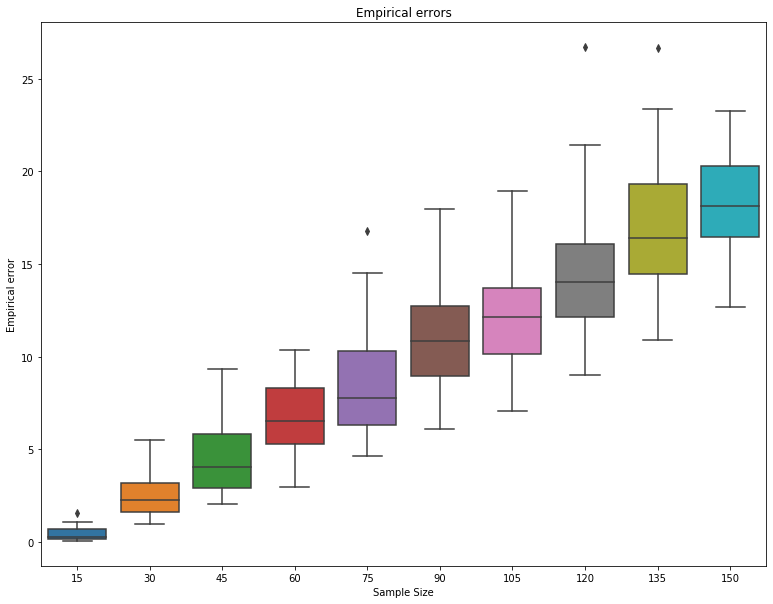

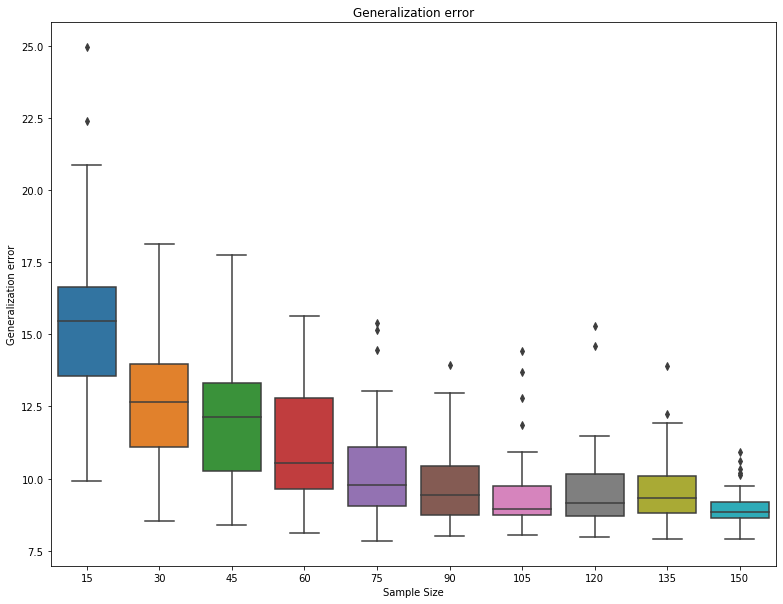

In [1213]:
fig = plt.figure(figsize=(13, 10));
ax = sns.boxplot(data=empirical_error, orient = 'v');
ax.set_xticklabels(N.flatten().astype(int));
ax.set(xlabel="Sample Size", ylabel="Empirical error", title="Empirical errors");
fig = plt.figure(figsize=(13, 10));
ax = sns.boxplot(data=generalization_error, orient = 'v');
ax.set_xticklabels(N.flatten().astype(int));
ax.set(xlabel="Sample Size", ylabel="Generalization error", title="Generalization error");

We can see how the empirical error increase at the same time that the sample size, but the generalization error tends to stabilize since a certain sample size

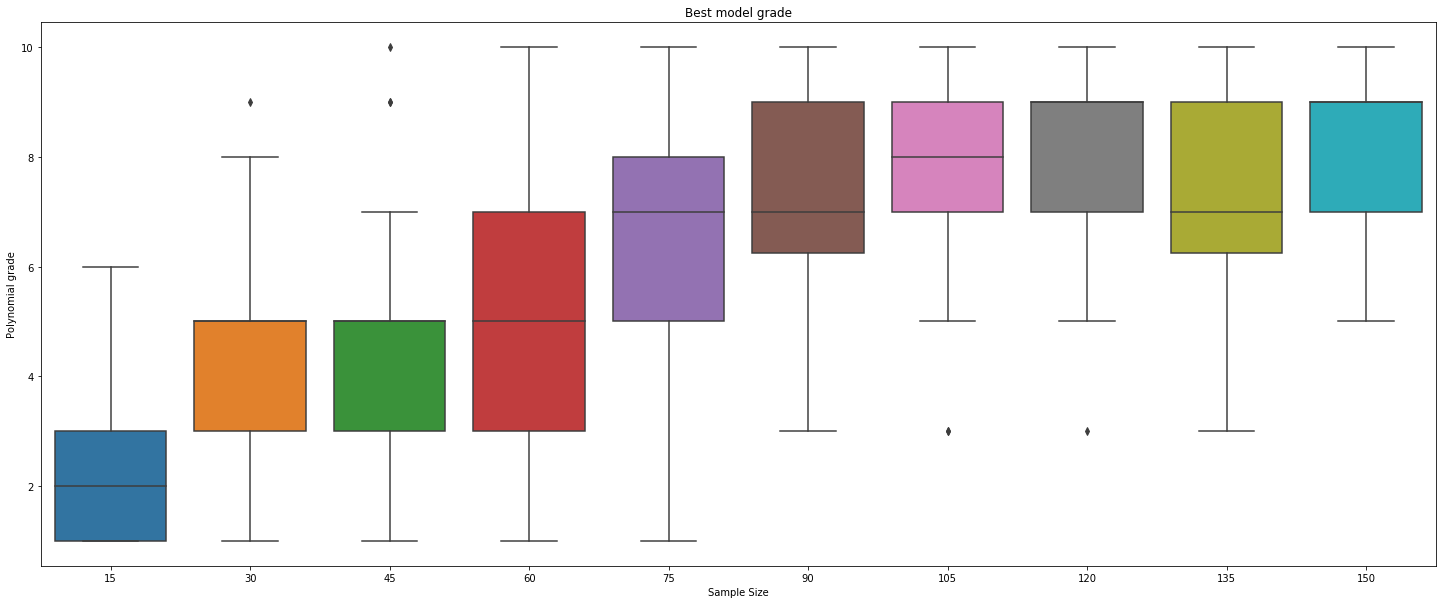

In [1214]:
fig = plt.figure(figsize=(25, 10));
ax = sns.boxplot(data=best_model+1, orient = 'v');
ax.set_xticklabels(N.flatten().astype(int));
ax.set(xlabel="Sample Size", ylabel="Polynomial grade", title="Best model grade");

In the best model plot we can see how higher grades of polynomial models are prefered, but those models tend to overfitting, so we will have to be careful when selecting a model.

# 2. Perceptron
1. Use a perceptron  to model the logic functions AND & OR.
2. Analyse the influence of $\alpha$ in the convergence speed and the precision of the result using ADALINE
3. Using the rules of the perceptron, solve the XOR problem.

In [1328]:
# Prepare data
epochs = 20000
alpha = 1
threshold = np.ones(pow(2,2)) # 2 entries with 2 possible values
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
x = np.transpose(np.array([threshold, x1, x2]))
print(np.shape(x))

(4, 3)


## Modeling AND and OR functions in a Perceptron

In [1306]:
# Functions
hardlim  = lambda x:  0 if x < 0  else 1
hardlims = lambda x: -1 if x < 0  else 1

# train with 1 element of the sample, used to train the perceptron
def perceptrain(x, desired_output, weights, alpha = 1):
    output = hardlims(np.dot(weights,x))
    error = desired_output - output
    weights = weights + alpha * np.dot(error,x)
    return weights

def deltatrain(x, desired_output, weights, alpha = 1.0, epochs = 200000):
    iterations = -1
    error = np.array([])
    stop = False
    while(iterations < epochs and not stop):
        output = np.dot(x,weights)        
        iterations = iterations + np.size(desired_output)
        error = np.append(error, desired_output - output)
        weights = weights + alpha* np.dot(desired_output - output, x)     
        stop = np.absolute( np.absolute(error[iterations]) - np.absolute(error[iterations-1]) ) < (0.0001 * np.size(desired_output))
    return weights, iterations, np.abs(desired_output - output)

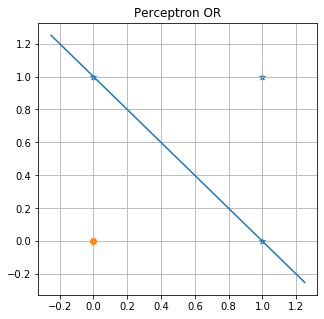

In [1307]:
#Training OR network
weight_or =  np.zeros(np.shape(x)[1]) #  np.random.rand(3) # 
desired_output = np.logical_or(x[:,1],x[:,2]).astype(np.double)
desired_output[desired_output == 0] = -1
n = np.size(desired_output)
for i in range(epochs*n):    
    weight_or = perceptrain( x[i % n, :], desired_output[i % n], weight_or, alpha);
#Plot OR Network Results
fig = plt.figure(figsize=(5, 5));
ax = plt.scatter(x[ desired_output == 1, 1], x[ desired_output == 1, 2], marker='*')
ax = plt.scatter(x[ desired_output == -1, 1], x[ desired_output == -1, 2], marker='o')
plt.grid()
px= np.array([min(x1-.25), max(x1+.25)])
py= (-weight_or[0]-weight_or[1]*px)/weight_or[2]
plt.plot(px,py);
plt.title("Perceptron OR");

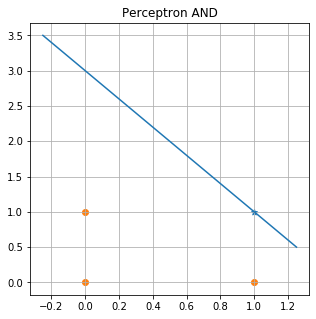

In [1308]:
#Training OR network
weight_and =  np.zeros(np.shape(x)[1]) #  np.random.rand(3) # 
desired_output = np.logical_and(x[:,1],x[:,2]).astype(np.double)
desired_output[desired_output == 0] = -1
n = np.size(desired_output)
for i in range(epochs*n):    
    weight_and = perceptrain( x[i % n, :], desired_output[i % n], weight_and, alpha);
#Plot OR Network Results
fig = plt.figure(figsize=(5, 5));
ax = plt.scatter(x[ desired_output == 1, 1], x[ desired_output == 1, 2], marker='*')
ax = plt.scatter(x[ desired_output == -1, 1], x[ desired_output == -1, 2], marker='o')
plt.grid()
px= np.array([min(x1-.25), max(x1+.25)])
py= (-weight_and[0]-weight_and[1]*px)/weight_and[2]
plt.plot(px,py);
plt.title("Perceptron AND");

## Using ADALINE to model OR or AND functions

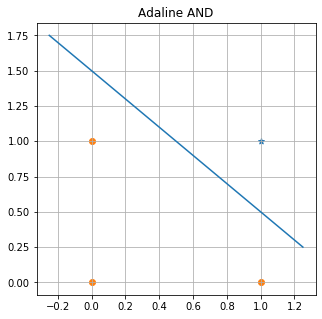

In [1309]:
#Adaline Training
#desired_output= np.logical_or(x[:,1],x[:,2]).astype(np.double)
desired_output = np.logical_and(x[:,1],x[:,2]).astype(np.double)
desired_output[desired_output == 0.0] = -1;
weight_adaline =  np.random.rand(np.shape(x)[1])/5 # np.array([0,0,0]) #  
alphas = np.arange(0.01,0.32,0.01);
final_weights = np.zeros( (np.size(alphas), np.size(weight_adaline)) );
iterations = np.zeros(np.size(alphas));
error = np.zeros( (np.size(alphas),np.size(desired_output)) );
#print(alphas)
for i in range(np.size(alphas)):
    final_weights[i,:], iterations[i], error[i,:] = deltatrain(x, desired_output, weight_adaline, alphas[i])
#Adaline result plot
fig = plt.figure(figsize=(5, 5));
ax = plt.scatter(x[ desired_output == 1, 1], x[ desired_output == 1, 2], marker='*')
ax = plt.scatter(x[ desired_output == -1, 1], x[ desired_output == -1, 2], marker='o')
plt.grid()
px= np.array([min(x1-.25), max(x1+.25)])
py= (-final_weights[0,0]-final_weights[0,1]*px)/final_weights[0,2]
plt.plot(px,py);
plt.title("Adaline AND");

## Study the influence of the learning rate in ADALINE results(speed and precision)

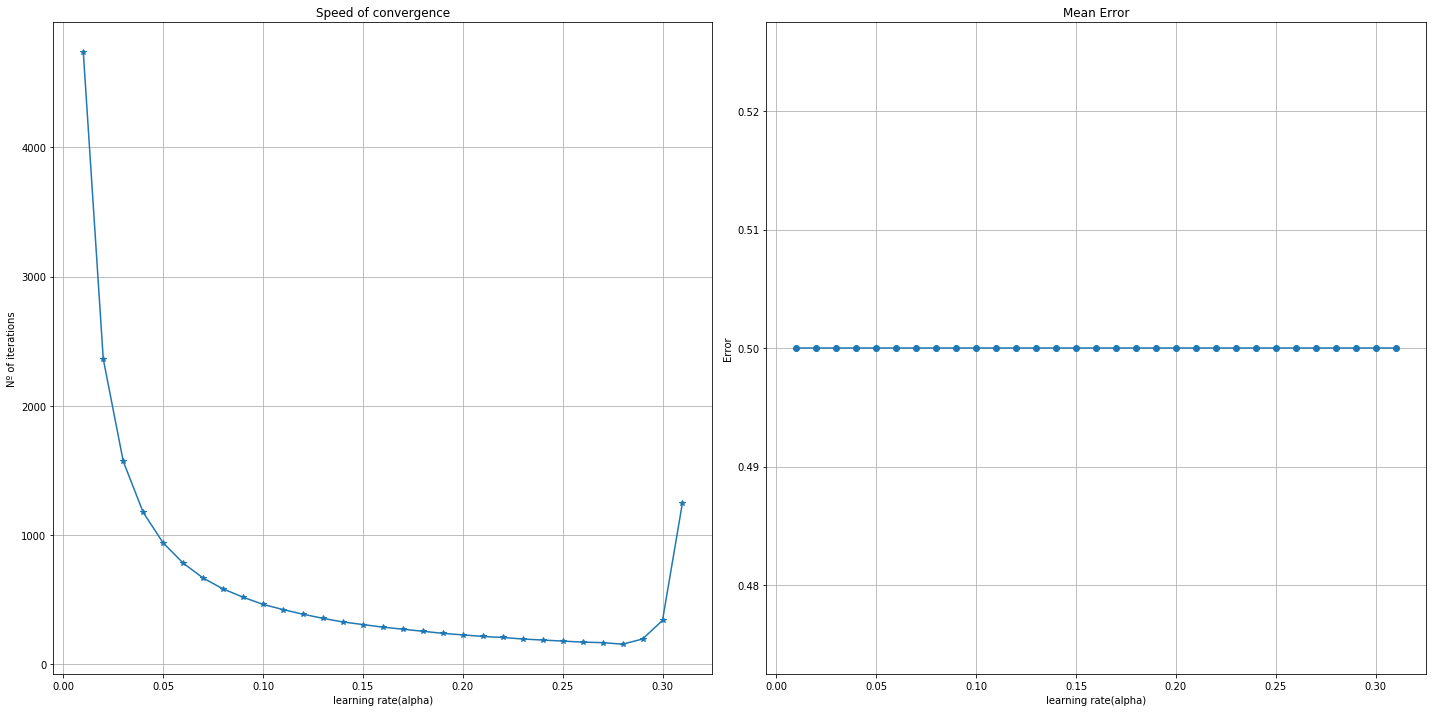

In [1310]:
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(alphas, iterations , marker='*')
axs[0].grid()
axs[0].set(xlabel="learning rate(alpha)", ylabel = "Nº of iterations")
axs[0].set(title="Speed of convergence");
axs[1].plot(alphas, np.mean(error,axis=1), marker='o')
axs[1].set(xlabel="learning rate(alpha)", ylabel = "Error")
axs[1].set(title="Mean Error");
axs[1].grid()
fig.tight_layout() 

We can see how a very low learning rate needs more iterations to converge, the same happens after a learning rate of 0.3 because the changes are greater than needed and make it harder for the weights to converge.

Both, The perceptron and Adaline, are used to binary classification for problems that have a linear decision boundary
The perceptron only use a binary response to improve its weights, so the precision of the network will be influenced a lot by the starting weights.
Adaline uses continous responses values to improve its weights based on 'how much' mistake it has made, with enought epochs it will converge to the an 'optimun' result.

## Using the rules of the perceptron, solve the XOR problem

We can model the XOR problem as $OR \cap  ¬ AND$, so we will train a perceptron or adaline with or and another with and

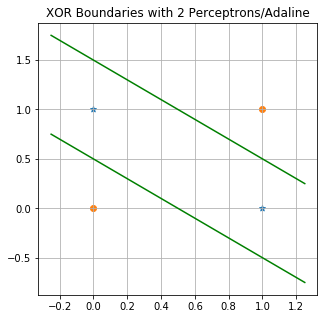

In [1340]:
desired_output_or  = np.logical_or(x[:,1],x[:,2]).astype(np.double)
desired_output_or[desired_output_or == 0.0] = -1;
desired_output_and = np.logical_and(x[:,1],x[:,2]).astype(np.double)
desired_output_and[desired_output_and == 0.0] = -1;
desired_output_xor = np.logical_xor(x[:,1],x[:,2]).astype(np.double)
desired_output_xor[desired_output_xor == 0.0] = -1;
n = np.size(desired_output_xor)

#Perceptron
#weights_xor = np.zeros( (2, np.shape(x)[1]) );
#for i in range(epochs*n):    
#    weights_xor[0,:] = perceptrain( x[i % n, :], desired_output_or[i % n] , weights_xor[0,:]);
#    weights_xor[1,:] = perceptrain( x[i % n, :], desired_output_and[i % n], weights_xor[1,:]);    

#Adaline
weights_xor = np.random.rand( 2, np.shape(x)[1] )/5
weights_xor[0,:], _, _ = deltatrain( x, desired_output_or , weights_xor[0,:], 0.29 );
weights_xor[1,:], _, _ = deltatrain( x, desired_output_and, weights_xor[1,:], 0.29 );    
#print(weights_xor)

# plot XOR network results
fig = plt.figure(figsize=(5, 5));
ax = plt.scatter(x[ desired_output_xor == 1, 1], x[ desired_output_xor == 1, 2], marker='*')
ax = plt.scatter(x[ desired_output_xor == -1, 1], x[ desired_output_xor == -1, 2], marker='o')
plt.grid()
px= np.array([min(x1-.25), max(x1+.25)])
py1 = (-weights_xor[0,0]-weights_xor[0,1]*px)/weights_xor[0,2]
py2 = (-weights_xor[1,0]-weights_xor[1,1]*px)/weights_xor[1,2]
plt.plot(px,py1,'g');
plt.plot(px,py2,'g');
plt.title("XOR Boundaries with 2 Perceptrons/Adaline");